Logistic Regression

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

In [51]:
xtrain = np.loadtxt('Data/train_data.csv', delimiter=',')
ytrain = np.loadtxt('Data/train_labels.csv', delimiter=',')
xtest = np.loadtxt('Data/test_data.csv', delimiter=',')

In [52]:
print(xtrain.shape)
print(xtrain)
print(ytrain.shape)
print(ytrain)

(4363, 264)
[[  3.73870000e+01  -1.72830000e+01   4.96400000e+01 ...,   1.70550000e+00
    1.03780000e+00   4.93660000e-02]
 [  4.94260000e+01   4.33780000e+01   8.73340000e+00 ...,   3.90250000e+00
    1.45800000e+00   1.06600000e-03]
 [  4.20750000e+01  -8.49980000e+01   8.62540000e-01 ...,   3.50320000e+00
    1.22110000e+00   1.06600000e-03]
 ..., 
 [  3.60810000e+01  -5.91510000e+01  -3.58150000e+01 ...,   2.03580000e+00
    8.31680000e-01   1.06600000e-03]
 [  4.22170000e+01  -4.59620000e+01  -3.39030000e+00 ...,   4.53300000e+00
    2.00180000e+00   3.17350000e-01]
 [  3.67530000e+01  -1.63540000e+00  -7.33680000e+01 ...,   1.67760000e+00
    7.72530000e-01   1.06600000e-03]]
(4363,)
[ 1.  1.  1. ...,  2.  5.  2.]


In [53]:
#convert the labels to a 0-1 array. 1 stays category 1, 0s are all other categories
ytrain1=ytrain.copy()
ytrain1[ytrain1!=1]=0

In [54]:
# instantiate a logistic regression model, and fit with X and y
model1 = LogisticRegression()

In [55]:
model1 = model1.fit(xtrain, ytrain1)

In [56]:
# check the accuracy on the training set
#here we can see that for only classifying category 1 accuracy is higher, but this is logical
model1.score(xtrain, ytrain1)

0.81205592482236988

In [57]:
#select the entries that not belong to category 1
ind_other=np.where(ytrain!=1)
ytrain2=ytrain[ind_other]
xtrain2=xtrain[ind_other]

In [58]:
#train a model on classifying all categories except for category 1
model2=LogisticRegression()
model2=model2.fit(xtrain2,ytrain2)

In [59]:
model2.score(xtrain2,ytrain2)

0.74782608695652175

In [64]:
#Test how well the whole pipeline (so the 2 models) perform on the training set
#run model 1
ytrainp=model1.predict(xtrain)
#select the data that is not classified as class 1
xtrain2p=xtrain[np.where(ytrainp!=1)]
#run model 2
ytrainp2=model2.predict(xtrain2p)
#combine the outcomes from the two models into one array
ytrainp3=ytrainp.copy()
ytrainp3[np.where(ytrainp3==0)]=ytrainp2

In [65]:
#get the accuracy score
#worse training score than when only using one model, so chances are low that it performs better on the test set :(
accuracy_score(ytrain,ytrainp3)

0.71647948659179461

In [8]:
ypred

array([ 3.,  9.,  1., ...,  1.,  3.,  1.])

In [67]:
#log loss
model2.predict_proba(xtrain2p)

array([[  6.87012000e-03,   1.13114207e-01,   3.18110862e-01, ...,
          3.14061727e-01,   7.46529188e-05,   2.25239587e-03],
       [  1.39588631e-02,   2.61081253e-02,   1.59769552e-03, ...,
          8.24139759e-02,   7.29642307e-03,   2.91344447e-01],
       [  1.46403201e-03,   4.07282145e-04,   1.15024849e-02, ...,
          1.84514449e-03,   2.24737159e-04,   1.50395652e-04],
       ..., 
       [  6.29375502e-01,   1.11749844e-03,   1.33873808e-01, ...,
          1.25413085e-04,   6.44628188e-05,   2.13312545e-01],
       [  1.58064774e-02,   8.24079604e-03,   4.83131624e-01, ...,
          2.54643454e-02,   2.29477533e-05,   1.94300002e-03],
       [  9.47355522e-01,   4.24660830e-02,   1.69439018e-05, ...,
          3.37767451e-13,   5.52198710e-04,   1.18030526e-04]])

In [9]:
subm=pd.DataFrame(ypred,columns=['Sample_label'])
subm.index+=1
subm=subm.astype(int)

In [10]:
subm

,Sample_label
1,3
2,9
3,1
4,1
5,1
6,1
7,5
8,1
9,1
10,1


In [11]:
subm.to_csv('Solutions/log_solution_accuracy_0911.csv',index_label='Sample_id')

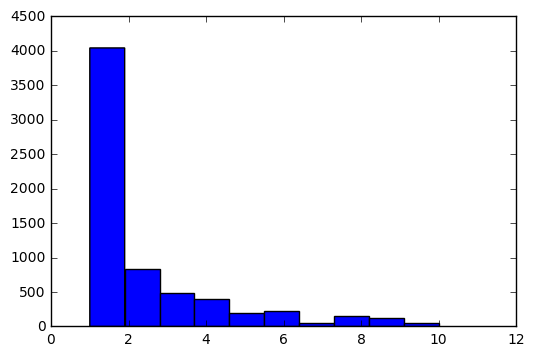

In [12]:
import matplotlib.pyplot as plt
plt.hist(ypred)
plt.show()